# 딥러닝1 : 회귀

## 1.환경준비

### (1) 라이브러리 로딩

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 그래프

### (2) 데이터로딩

In [110]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv'
data = pd.read_csv(path)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


|	변수	|	설명	|
|	----	|	----	|
|	medv	|	타운별 집값(중위수)	|
|	crim	|	범죄율	|
|	zn	|	25,000 평방피트를 초과 거주지역 비율	|
|	indus	|	비소매상업지역 면적 비율	|
|	chas	|	찰스강변 위치(범주 : 강변1, 아니면 0)	|
|	nox	|	일산화질소 농도	|
|	rm	|	주택당 방 수	|
|	age	|	1940년 이전에 건축된 주택의 비율	|
|	dis	|	직업센터의 거리	|
|	rad	|	방사형 고속도로까지의 거리	|
|	tax	|	재산세율	|
|	ptratio	|	학생/교사 비율	|
|	lstat	|	인구 중 하위 계층 비율	|


## 2.데이터 준비

lstat, ptratio, crim 만 이용하여 medv를 예측하는 모델을 만들어 봅시다.

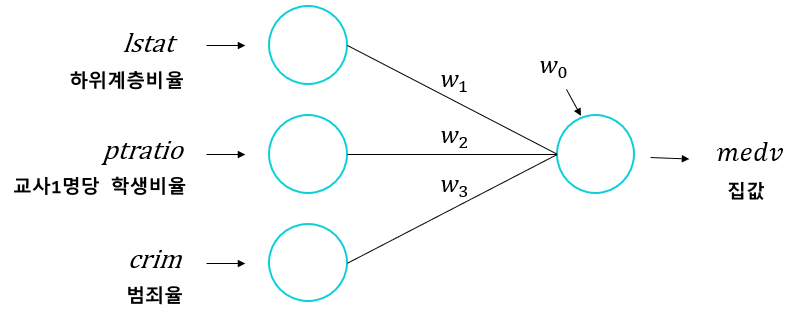

### (1) 데이터 준비
* x, y 나누기
    * x : lstat, ptratio, crim
    * y : medv

In [30]:
target = 'medv'
features = ['lstat', 'ptratio', 'crim']
x = data.loc[:, features]
y = data.loc[:, target]


### (2) NaN 조치

### (3) 가변수화

### (4) 데이터분할

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

### (5) Scaling

In [32]:
# 스케일러 선언
scaler = MinMaxScaler()

# train 셋으로 fitting & 적용
x_train = scaler.fit_transform(x_train)

# validation 셋은 적용만!
x_val = scaler.transform(x_val)

## 3.딥러닝1 : 3개의 feature

### (1) 모델설계

In [33]:
# 분석단위의 shape
nfeatures = x_train.shape[1] #num of columns
nfeatures

3

In [38]:
# 메모리 정리
clear_session()

# Sequential 타입
model = Sequential(
    [Input(shape = (nfeatures, )) , Dense(1)]
)

# 모델요약
model.summary()
# 컴파일
model.compile(optimizer = Adam(learning_rate=0.1),loss= 'mse')

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

* compile
    * optimizer = 'adam'    : 기본값으로 옵티마이저 사용(learning_rate = 0.001)
    * optimizer = Adam(learning_rate = 0.1) : 옵션 값 조정 가능
        * lr과 learning_rate은 같지만, learning_rate 사용을 권장

### (2) 학습

validation_split=0.2 : 학습시, 학습용 데이터에서 0.2 만큼 떼어 내서 검증셋으로 활용

In [39]:
history = model.fit(x_train, y_train, epochs = 30, validation_split=0.2).history

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 512.3137 - val_loss: 534.3361
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 508.6281 - val_loss: 461.3730
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 374.1257 - val_loss: 401.3011
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 336.1116 - val_loss: 351.6166
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 313.2820 - val_loss: 313.4503
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 245.7975 - val_loss: 282.5254
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 215.0183 - val_loss: 257.1974
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 227.1889 - val_loss: 237.9703
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 193.2718 - val_loss: 224.4118
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 173.8365 - val_loss: 213.6279
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 180.8664 - val_loss: 205.3774
Epoch 12/30
11/11 ━━━━━━━━━━━

* 학습결과 그래프

In [40]:
# 함수로 만들어서 사용합시다.
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

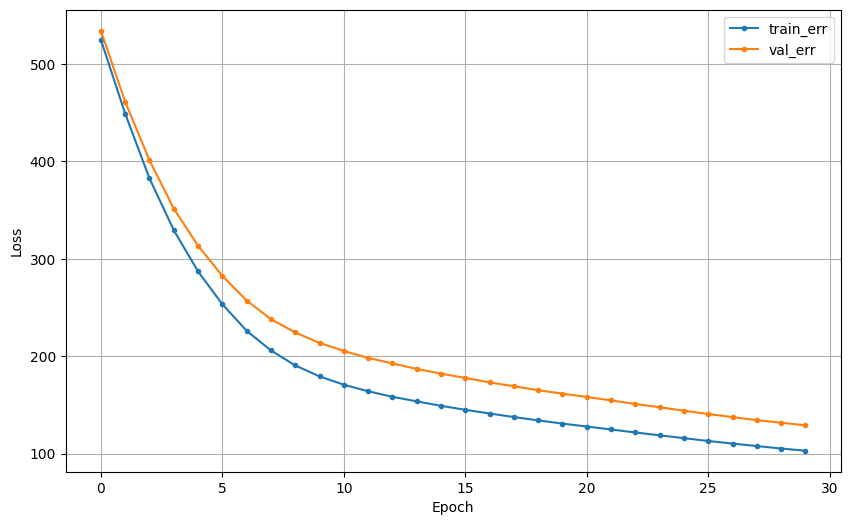

In [41]:
dl_history_plot(history)

### (3) 예측 및 검증

In [42]:
pred = model.predict(x_val)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [43]:
print(f'RMSE : {mean_squared_error(y_val, pred, squared=False)}')
print(f'MAE  : {mean_absolute_error(y_val, pred)}')
print(f'MAPE : {mean_absolute_percentage_error(y_val, pred)}')

RMSE : 8.766967724993195
MAE  : 5.876422782972747
MAPE : 0.3025953359953625


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [57]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [58]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [59]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [60]:
# 메모리 정리
clear_session()
# Sequential 타입 모델 선언
model = Sequential(
		[Input(shape =(nfeatures,)), # 1차원 shape
     Dense(1)]
     )
# 모델요약
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [61]:
# 컴파일
model.compile(optimizer = Adam(learning_rate = 0.1), loss = 'mse')

* 학습

In [62]:
# 4) 학습
history = model.fit(x_train, y_train , epochs = 30 , validation_split= 0.2).history

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 516.3558 - val_loss: 435.1269
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 344.4258 - val_loss: 298.1486
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 225.9824 - val_loss: 224.7981
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 175.6345 - val_loss: 189.8608
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 156.1039 - val_loss: 171.4900
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 121.3244 - val_loss: 157.4993
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 120.0638 - val_loss: 143.9197
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 117.4341 - val_loss: 131.9477
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 120.3709 - val_loss: 120.7986
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 101.0245 - val_loss: 111.2754
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 101.0157 - val_loss: 102.7583
Epoch 12/30
11/11 ━━━━━━━━━━

* 학습결과 그래프

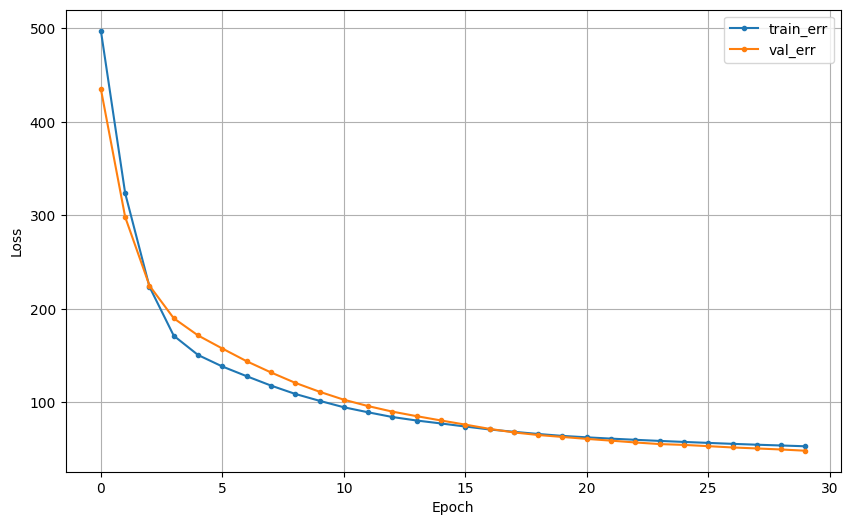

In [63]:
dl_history_plot(history)

* 예측 및 평가

In [65]:
pred = model.predict(x_val)

# 6) 검증
print(f'RMSE  : {root_mean_squared_error(y_val, pred)}')
print(f'MAE   : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE  : 6.348980740535897
MAE   : 4.738293499105118
MAPE  : 0.23874830669293523


## 5.실습!
* 위 4번에 이어서, 여러분은 다음을 조절할 수 있습니다.
    * epochs(반복횟수), learning_rate(학습율)
* 4번 코드를 그대로 보면서 작성하고 위 두가지를 조절하며 성능을 높여봅시다!

### (1) 데이터 전처리

* 데이터 분할

In [76]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [77]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [78]:
# 모델 선언
nfeatures = x_train.shape[1]
# 메모리 정리
clear_session()
model = Sequential(
    [Input(shape = (nfeatures,)) , Dense(1)]
)
# 모델 요약
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [79]:
# 컴파일
model.compile(optimizer = Adam(learning_rate=0.05),loss= 'mse')

* 학습

In [84]:
history = model.fit(x_train, y_train ,epochs= 30 , validation_split=0.2,verbose=0).history

* 학습결과 그래프

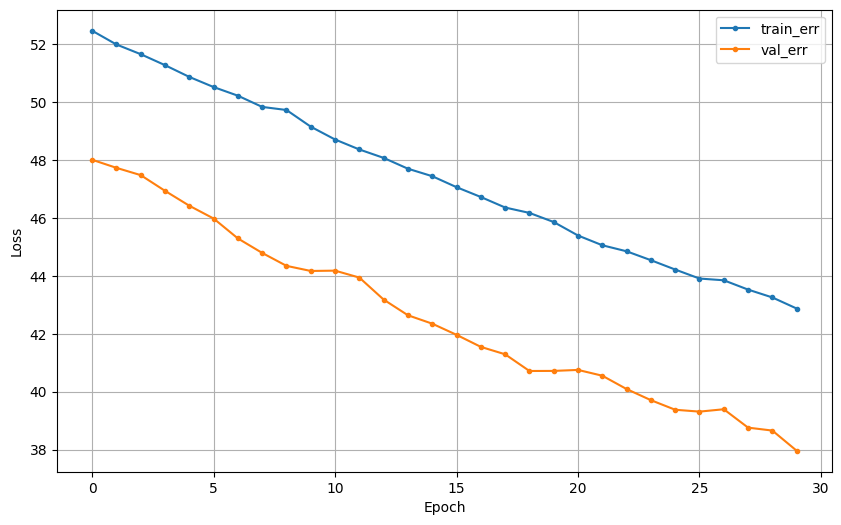

In [85]:
dl_history_plot(history)

* 예측 및 평가

In [94]:
# 5) 예측
pred = model.predict(x_val)
# 6) 검증
print(f'RMSE  : {root_mean_squared_error(y_val, pred)}')
print(f'MAE   : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSE  : 4.694795724205618
MAE   : 3.726417062796799
MAPE  : 0.19516235586473904


----

## 5.딥러닝3 : hidden layer!
* 이제 레이어를 추가해 보겠습니다.


### (1) 데이터 전처리

* 데이터 분할

In [125]:
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

* 스케일링

In [126]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [127]:
nfeatures = x_train.shape[1] #num of columns
nfeatures

12

In [128]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언(입력은 리스트로!)
model3 = Sequential([Input(shape = (nfeatures,)),
                     Dense(2, activation = 'relu'), # 은닉층
                     Dense(1)   ])

# 모델요약
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29 (116.00 B)

 Trainable params: 29 (116.00 B)

 Non-trainable params: 0 (0.00 B)

* compile

In [135]:
model3.compile(optimizer = Adam(learning_rate = 0.01), loss = 'mse')

* 학습

In [136]:
history = model3.fit(x_train, y_train , epochs = 100 , validation_split= 0.2 , verbose = 0).history

* 학습결과 그래프

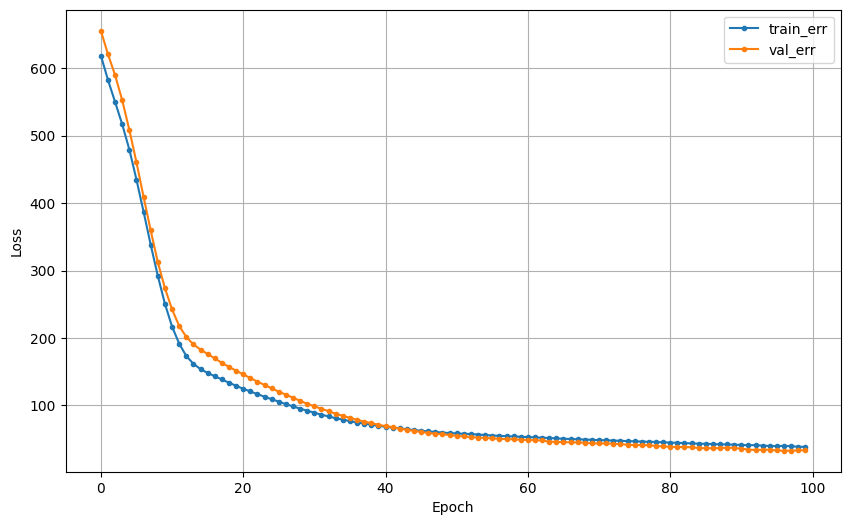

In [137]:
dl_history_plot(history)

* 예측 및 평가

In [138]:
# 5) 예측
pred = model3.predict(x_val)
# 6) 검증
print(f'RMSE  : {root_mean_squared_error(y_val, pred)}')
print(f'MAE   : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
RMSE  : 5.5536233206860235
MAE   : 4.186147670184865
MAPE  : 0.20335014557308817


### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | Param # |
| ---- | ---- | ---- |
| dense (Dense) | (None, 8) | 104 |
| dense_1 (Dense) | (None, 1) | 9 |     

In [139]:
# 데이터 분할
target = 'medv'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)
# 데이터 전처리
# 1) 전처리: Scaling
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

# 3) 모델 선언
nfeatures = x_train.shape[1] #num of columns
# 메모리 정리
clear_session()
# Sequential 타입 모델 선언
model = Sequential(
		[Input(shape =(nfeatures,)), # 1차원 shape
     Dense(8, activation = 'relu'),
     Dense(1)]
     )
# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113 (452.00 B)

 Trainable params: 113 (452.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [140]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss='mse')
# 4) 학습
history = model.fit(x_train, y_train ,epochs= 30 , validation_split=0.2,verbose=0).history

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 597.7098 - val_loss: 639.8141
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 560.6371 - val_loss: 607.7490
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 585.9157 - val_loss: 570.0176
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 494.0296 - val_loss: 519.5244
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 447.4761 - val_loss: 454.8698
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 403.7661 - val_loss: 381.5090
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 313.0301 - val_loss: 311.3155
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 288.9528 - val_loss: 255.1361
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 187.9825 - val_loss: 217.1240
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 173.2992 - val_loss: 192.5512
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 159.6750 - val_loss: 177.7191
Epoch 12/30
11/11 ━━━━━━━━━━━

* 학습곡선

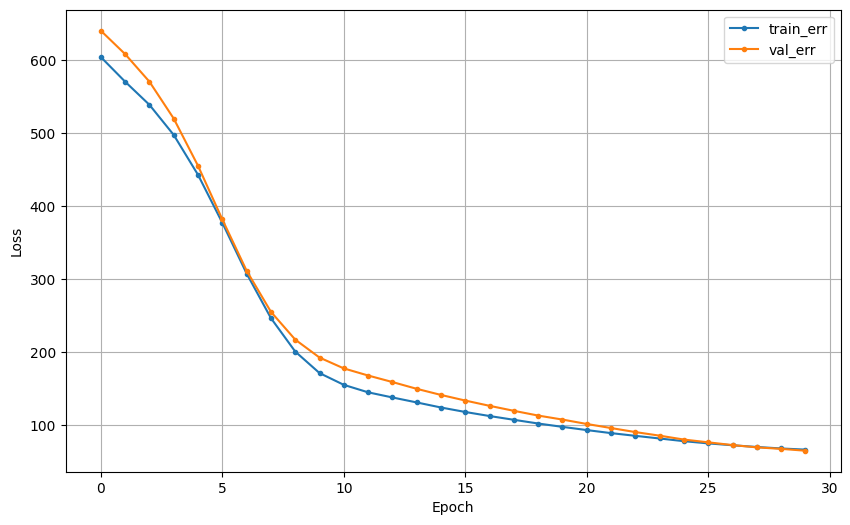

In [141]:
dl_history_plot(history)

* 검증

In [142]:
pred = model.predict(x_val)
# 6) 검증
print(f'RMSE  : {root_mean_squared_error(y_val, pred)}')
print(f'MAE   : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
RMSE  : 6.999634644844489
MAE   : 5.026244099934897
MAPE  : 0.26207060382560754


### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |
| ---- | ---- |
| dense (Dense) | (None, 8) |
| dense_1 (Dense) | (None, 4) |
| dense_2 (Dense) | (None, 1) |

In [143]:
# 3) 모델 선언
nfeatures = x_train.shape[1] #num of columns
# 메모리 정리
clear_session()
# Sequential 타입 모델 선언
model = Sequential(
		[Input(shape =(nfeatures,)), # 1차원 shape
     Dense(8, activation='relu'),
     Dense(4, activation='relu'),
     Dense(1)]
     )
# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 145 (580.00 B)

 Trainable params: 145 (580.00 B)

 Non-trainable params: 0 (0.00 B)

* 컴파일 + 학습

In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.01), loss='mse')
# 4-1) (옵션 )history 저장 , 학습결과 그래프
history = model.fit(x_train, y_train ,epochs= 30 , validation_split=0.2).history

* 학습곡선

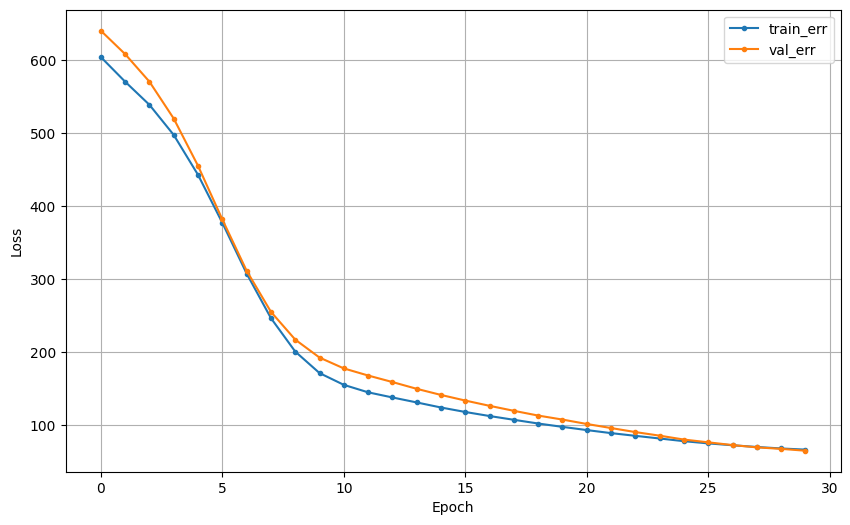

In [144]:
dl_history_plot(history)

* 검증

In [145]:
# 5) 예측
pred = model.predict(x_val)
# 6) 검증
print(f'RMSE  : {root_mean_squared_error(y_val, pred)}')
print(f'MAE   : {mean_absolute_error(y_val, pred)}')
print(f'MAPE  : {mean_absolute_percentage_error(y_val, pred)}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
RMSE  : 23.032751919776537
MAE   : 21.57776015484158
MAPE  : 0.9967265910653548


* 회귀 모델 예측값 vs 실제값 그래프

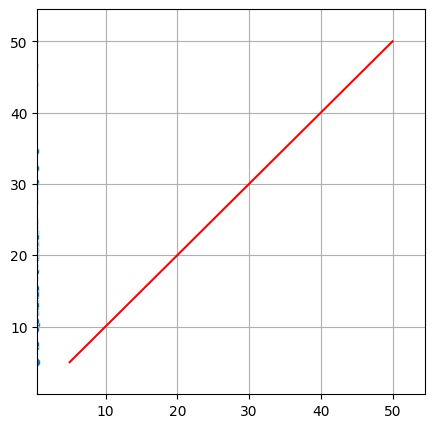

In [146]:
def visualization_result(y_val,pred):
    plt.figure(figsize = (5,5))
    y = x = np.linspace(y_val.min(), y_val.max(), 10)

    y_range = y_val.max() - y_val.min()
    mi, ma = y_val.min() - y_range*0.1 , y_val.max()+ y_range*0.1

    sns.scatterplot(x= pred.reshape(-1), y = y_val.values)
    sns.lineplot(x = x, y = y, color = 'r')
    plt.xlim(mi, ma)
    plt.ylim(mi, ma)
    plt.grid()

    plt.show()

visualization_result(y_val,pred)